# Iris flower Classification

**Iris flower classification** is a very popular machine learning project. The iris dataset contains three classes of flowers, `Versicolor`, `Setosa`, `Virginica`, and each class contains 4 features, `‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’.` 

The aim of the iris flower classification is to predict flowers based on their specific features.

### Imports

In [1]:
import os
os.system("pip install katonic[ml]")

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

from katonic.ml.classification import Classifier

## Data Prepration

In [3]:
# loading the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
   
    return summary

In [6]:
resumetable(df)

Dataset Shape: (150, 4)


,Name,dtypes,Missing,Uniques
0,sepal length (cm),float64,0,35
1,sepal width (cm),float64,0,23
2,petal length (cm),float64,0,43
3,petal width (cm),float64,0,22


### Target data

- The target data frame is only one column, and it gives a list of the values 0, 1, and 2. 

    - 0 is Iris Setosa
    - 1 is Iris Versicolour
    - 2 is Iris Virginica

In [7]:
#put target data into data frame
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})

In [8]:
df = pd.concat([df, target], axis = 1)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

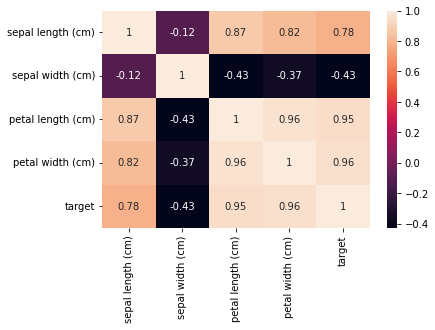

In [10]:
sns.heatmap(df.corr(), annot = True);

- `Petal length` and `petal width` is most correlated with the target, meaning that as these numbers increase, so does the target value. In this case, it means that flowers in class 2 often have longer petal length and width than flowers in class 0. 

- `Sepal width` is most anti-correlated, indicating that flowers in class 0 have the greatest sepal width than those in class 2. 

- We can also see some intercorrelation between features, for example `petal width` and `petal length` are also highly correlated.

#### The relationships between features

The different classes of flowers relate to sepal and petal data.

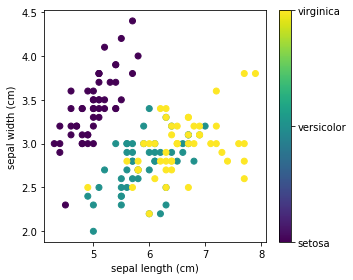

In [11]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

Relationship between sepal width and length between the three classes of flowers.

Virginica and versica look to be relatively similar in sepal size, but setosa has created its own cluster to the left.

## Data Splitting

In [12]:
# X -> features, y -> label
X = df
y = iris.target

In [13]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
 

## Standardize

In [44]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Modelling

In [45]:
exp_name = "iris_multi_class"

In [46]:
clf = Classifier(X_train, X_test, y_train, y_test, exp_name, multiclass=True, average='weighted')

In [47]:
exp_id = clf.id
print("experiment name : ", clf.name)
print("experiment location : ", clf.location)
print("experiment id : ", clf.id)
print("experiment status : ", clf.stage)

experiment name :  iris_multi_class
experiment location :  s3://models/15
experiment id :  15
experiment status :  active


## Logistic Regression



In [48]:
clf.LogisticRegression(multi_class='ovr')

## GradientBoostingClassifier

In [49]:
clf.GradientBoostingClassifier()

## RandomForestClassifier

In [50]:
clf.RandomForestClassifier(random_state = 42)

## AdaBoostClassifier

In [51]:
clf.AdaBoostClassifier(random_state = 42)

### LightGBMClassifier

In [52]:
clf.LGBMClassifier()

### XGBClassifier

In [53]:
clf.XGBClassifier()

[09:23:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### DecisionTreeClassifier

In [54]:
clf.DecisionTreeClassifier()

### SupportVectorClassifier

In [55]:
clf.SupportVectorClassifier()

### RidgeClassifier

In [56]:
clf.RidgeClassifier()

### KNeighborsClassifier

In [57]:
clf.KNeighborsClassifier()

### GaussianNB

In [58]:
clf.GaussianNB()

## CatBoostClassifier

In [59]:
clf.CatBoostClassifier(random_state=42)

Learning rate set to 0.071017
0:	learn: 1.0011431	total: 408us	remaining: 408ms
1:	learn: 0.9238316	total: 937us	remaining: 468ms
2:	learn: 0.8409132	total: 1.25ms	remaining: 414ms
3:	learn: 0.7695665	total: 1.53ms	remaining: 381ms
4:	learn: 0.7088633	total: 1.82ms	remaining: 363ms
5:	learn: 0.6605309	total: 2.29ms	remaining: 379ms
6:	learn: 0.6134548	total: 2.58ms	remaining: 366ms
7:	learn: 0.5704830	total: 2.99ms	remaining: 371ms
8:	learn: 0.5349663	total: 3.32ms	remaining: 365ms
9:	learn: 0.5068303	total: 3.78ms	remaining: 374ms
10:	learn: 0.4750797	total: 4.2ms	remaining: 377ms
11:	learn: 0.4456092	total: 4.66ms	remaining: 384ms
12:	learn: 0.4188807	total: 5.15ms	remaining: 391ms
13:	learn: 0.3898643	total: 5.59ms	remaining: 393ms
14:	learn: 0.3691389	total: 6.23ms	remaining: 409ms
15:	learn: 0.3500474	total: 6.86ms	remaining: 422ms
16:	learn: 0.3278095	total: 7.2ms	remaining: 416ms
17:	learn: 0.3109270	total: 7.81ms	remaining: 426ms
18:	learn: 0.2955643	total: 8.62ms	remaining: 44

## Get runs

In [60]:
# Select the run of the experiment
df_runs = clf.search_runs(exp_id)
print("Number of runs done : ", len(df_runs))
df_runs.head()

Number of runs done :  24


,artifact_uri,end_time,experiment_id,metrics.accuracy_score,metrics.f1_score,metrics.precision_score,metrics.recall,run_id,run_name,start_time,status,tags.mlflow.log-model.history
0,s3://models/15/7020de44c821427abf78c64210ed72e...,2022-06-09 09:23:47.382000+00:00,15,1.0,1.0,1.0,1.0,7020de44c821427abf78c64210ed72e2,iris_multi_class_15_cat_boost_classifier,2022-06-09 09:23:45.040000+00:00,FINISHED,"[{""run_id"": ""7020de44c821427abf78c64210ed72e2""..."
1,s3://models/15/2151eb134c35446e869225fe27c1ed5...,2022-06-09 09:23:45.006000+00:00,15,1.0,1.0,1.0,1.0,2151eb134c35446e869225fe27c1ed5f,iris_multi_class_15_gaussian_NB_classifier,2022-06-09 09:23:42.890000+00:00,FINISHED,"[{""run_id"": ""2151eb134c35446e869225fe27c1ed5f""..."
2,s3://models/15/04cbce59ecb64efaaff10b8919db87d...,2022-06-09 09:23:42.849000+00:00,15,1.0,1.0,1.0,1.0,04cbce59ecb64efaaff10b8919db87d6,iris_multi_class_15_k_neighbors_classifier,2022-06-09 09:23:40.616000+00:00,FINISHED,"[{""run_id"": ""04cbce59ecb64efaaff10b8919db87d6""..."
3,s3://models/15/cb243a2cd62146cfaf56dc4b3f60d63...,2022-06-09 09:23:40.585000+00:00,15,1.0,1.0,1.0,1.0,cb243a2cd62146cfaf56dc4b3f60d637,iris_multi_class_15_ridge_classifier,2022-06-09 09:23:38.398000+00:00,FINISHED,"[{""run_id"": ""cb243a2cd62146cfaf56dc4b3f60d637""..."
4,s3://models/15/a03cf9b9a5be440394bd61d72f8c629...,2022-06-09 09:23:38.365000+00:00,15,1.0,1.0,1.0,1.0,a03cf9b9a5be440394bd61d72f8c6297,iris_multi_class_15_svm_classifier,2022-06-09 09:23:36.186000+00:00,FINISHED,"[{""run_id"": ""a03cf9b9a5be440394bd61d72f8c6297""..."


In [61]:
df_runs.shape

(24, 12)

## Evaluating  Models

In [62]:
top_runs = df_runs.sort_values(['metrics.accuracy_score'], ascending=False)
top_runs.head()

,artifact_uri,end_time,experiment_id,metrics.accuracy_score,metrics.f1_score,metrics.precision_score,metrics.recall,run_id,run_name,start_time,status,tags.mlflow.log-model.history
0,s3://models/15/7020de44c821427abf78c64210ed72e...,2022-06-09 09:23:47.382000+00:00,15,1.0,1.0,1.0,1.0,7020de44c821427abf78c64210ed72e2,iris_multi_class_15_cat_boost_classifier,2022-06-09 09:23:45.040000+00:00,FINISHED,"[{""run_id"": ""7020de44c821427abf78c64210ed72e2""..."
1,s3://models/15/2151eb134c35446e869225fe27c1ed5...,2022-06-09 09:23:45.006000+00:00,15,1.0,1.0,1.0,1.0,2151eb134c35446e869225fe27c1ed5f,iris_multi_class_15_gaussian_NB_classifier,2022-06-09 09:23:42.890000+00:00,FINISHED,"[{""run_id"": ""2151eb134c35446e869225fe27c1ed5f""..."
22,s3://models/15/d3e0e5fbb9e24cf490044701de8d811...,2022-06-09 09:14:20.106000+00:00,15,1.0,1.0,1.0,1.0,d3e0e5fbb9e24cf490044701de8d8114,iris_multi_class_15_gradient_boosting_classifier,2022-06-09 09:14:17.717000+00:00,FINISHED,"[{""run_id"": ""d3e0e5fbb9e24cf490044701de8d8114""..."
21,s3://models/15/d2a963eaa07b4b938b4101df2f78f76...,2022-06-09 09:14:23.735000+00:00,15,1.0,1.0,1.0,1.0,d2a963eaa07b4b938b4101df2f78f766,iris_multi_class_15_random_forest_classifier,2022-06-09 09:14:21.365000+00:00,FINISHED,"[{""run_id"": ""d2a963eaa07b4b938b4101df2f78f766""..."
20,s3://models/15/b8595f74ff02491db98144d781bed64...,2022-06-09 09:14:27.321000+00:00,15,1.0,1.0,1.0,1.0,b8595f74ff02491db98144d781bed646,iris_multi_class_15_ada_boost_classifier,2022-06-09 09:14:24.982000+00:00,FINISHED,"[{""run_id"": ""b8595f74ff02491db98144d781bed646""..."


## Selecting best model

In [63]:
artifacts = top_runs.iloc[0]["artifact_uri"]
run_id = top_runs.iloc[0]["run_id"]
model_name = top_runs.iloc[0]["run_name"] 


print('Best model_artifacts :', artifacts)
print("=" * 100)
print('Best model run_id :', run_id)
print("=" * 100)
print('Best model :', model_name)
print("=" * 100)
print("Best model experiment id :", exp_id)

Best model_artifacts : s3://models/15/7020de44c821427abf78c64210ed72e2/artifacts
Best model run_id : 7020de44c821427abf78c64210ed72e2
Best model : iris_multi_class_15_cat_boost_classifier
Best model experiment id : 15


## Registering best model

In [64]:
result = clf.staging(
    run_id=run_id,
    model_name=model_name,
    stage="Production"
)

Registered model 'iris_multi_class_15_cat_boost_classifier' already exists. Creating a new version of this model...
2022/06/09 09:23:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris_multi_class_15_cat_boost_classifier, version 2
Created version '2' of model 'iris_multi_class_15_cat_boost_classifier'.


In [65]:
print('Registered model information :')
print('=='*50)
result

Registered model information :


name: "iris_multi_class_15_cat_boost_classifier"
version: "2"
creation_timestamp: 1654766627594
last_updated_timestamp: 1654766627621
user_id: ""
current_stage: "Production"
description: ""
source: "s3://models/15/7020de44c821427abf78c64210ed72e2/artifacts"
run_id: "7020de44c821427abf78c64210ed72e2"
status: READY
run_link: ""

In [66]:
m = clf.load_model(f"{artifacts}/{model_name}")

## Predict

In [67]:
y_pred = m.predict(X_test)

In [ ]:
# Prepare variable as DataFrame in pandas
df = pd.DataFrame(X_test)

# Add the target variable to df
df["y_pred"] = y_pred